In [1]:
!pip install findspark

In [2]:
import findspark
findspark.init("C:\spark")

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [5]:
spark_df=spark.read.csv("churn.csv", header = True, inferSchema = True, sep = ",")

In [6]:
spark_df.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [7]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [8]:
spark_df.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'string'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int')]

In [9]:
spark_df.head(2)

[Row(RowNumber=1, CustomerId=15634602, Surname='Hargrave', CreditScore=619, Geography='France', Gender='Female', Age=42, Tenure=2, Balance=0.0, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=101348.88, Exited=1),
 Row(RowNumber=2, CustomerId=15647311, Surname='Hill', CreditScore=608, Geography='Spain', Gender='Female', Age=41, Tenure=1, Balance=83807.86, NumOfProducts=1, HasCrCard=0, IsActiveMember=1, EstimatedSalary=112542.58, Exited=0)]

In [10]:
spark_df.show(2, truncate = True)

+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|     0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1|83807.86|            1|        0|             1|      112542.58|     0|
+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
only showing top 2 rows



In [11]:
spark_df.count()

10000

In [12]:
len(spark_df.columns)

14

In [13]:
spark_df.describe("Age").show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|             10000|
|   mean|           38.9218|
| stddev|10.487806451704587|
|    min|                18|
|    max|                92|
+-------+------------------+



In [14]:
spark_df.describe("Exited").show()

+-------+-------------------+
|summary|             Exited|
+-------+-------------------+
|  count|              10000|
|   mean|             0.2037|
| stddev|0.40276858399486065|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [15]:
spark_df.select("Tenure", "Exited").show(5)

+------+------+
|Tenure|Exited|
+------+------+
|     2|     1|
|     1|     0|
|     8|     1|
|     1|     0|
|     2|     0|
+------+------+
only showing top 5 rows



In [16]:
spark_df.select("Tenure").distinct().count()

11

In [17]:
spark_df.select("Exited").distinct().count()

2

In [18]:
spark_df.crosstab("Exited", "Gender").show()

+-------------+------+----+
|Exited_Gender|Female|Male|
+-------------+------+----+
|            1|  1139| 898|
|            0|  3404|4559|
+-------------+------+----+



In [19]:
spark_df.crosstab("Exited", "Geography").show()

+----------------+------+-------+-----+
|Exited_Geography|France|Germany|Spain|
+----------------+------+-------+-----+
|               1|   810|    814|  413|
|               0|  4204|   1695| 2064|
+----------------+------+-------+-----+



In [20]:
spark_df.dropna().count()

10000

In [21]:
spark_df.groupby("Exited").agg({"Age":"mean"}).show()

+------+-----------------+
|Exited|         avg(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [22]:
spark_df.groupby("Exited").agg({"IsActiveMember":"mean"}).show()

+------+-------------------+
|Exited|avg(IsActiveMember)|
+------+-------------------+
|     1|0.36082474226804123|
|     0| 0.5545648624890117|
+------+-------------------+



In [23]:
spark_df.groupby("Exited").agg({"Tenure":"mean"}).show()

+------+-----------------+
|Exited|      avg(Tenure)|
+------+-----------------+
|     1|4.932744231713304|
|     0|5.033278914981791|
+------+-----------------+



In [24]:
spark_df.groupby("Exited").agg({"NumOfProducts":"mean"}).show()

+------+------------------+
|Exited|avg(NumOfProducts)|
+------+------------------+
|     1|1.4752086401570939|
|     0|1.5442672359663443|
+------+------------------+



In [25]:
spark_df.withColumnRenamed("Exited", "Bagimli degisken")

DataFrame[RowNumber: int, CustomerId: int, Surname: string, CreditScore: int, Geography: string, Gender: string, Age: int, Tenure: int, Balance: double, NumOfProducts: int, HasCrCard: int, IsActiveMember: int, EstimatedSalary: double, Bagimli degisken: int]

In [26]:
spark_df.drop("CustomerID", "Surname").columns

['RowNumber',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sdf = spark_df.toPandas()
sdf.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


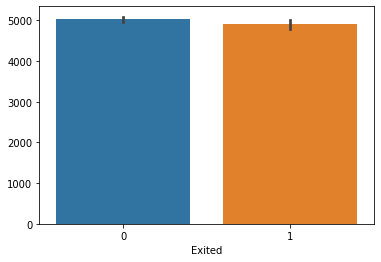

In [31]:
sns.barplot(x = "Exited", y = sdf.Exited.index, data =sdf)

In [32]:
spark_df.select("Surname").count()

10000

In [33]:
spark_df.select("CustomerID").count()

10000

In [34]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [35]:
spark_df.filter(spark_df.Age>44).count()

2340

In [36]:
spark_df.filter(spark_df.NumOfProducts>2).count()

326

MODELLEME

In [37]:
from pyspark.ml.feature import StringIndexer

In [38]:
stringIndexer = StringIndexer(inputCol = "Exited", outputCol = "label")

In [39]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [40]:
indexed.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'string'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int'),
 ('label', 'double')]

In [41]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [42]:
spark_df = indexed.withColumn("Gender", indexed["Gender"].cast("integer"))

In [43]:
spark_df.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'int'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int'),
 ('label', 'double')]

In [44]:
bagimsiz = ["CreditScore", "Age", "Tenure", "HasCrCard", "EstimatedSalary", "IsActiveMember", "NumOfProducts", "Balance"]

In [45]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = bagimsiz, outputCol = "features")

In [46]:
va_df = vectorAssembler.transform(spark_df)

In [47]:
final_df = va_df.select(["features", "label"])

In [48]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[619.0,42.0,2.0,1...|  1.0|
|[608.0,41.0,1.0,0...|  0.0|
|[502.0,42.0,8.0,1...|  1.0|
|[699.0,39.0,1.0,0...|  0.0|
|[850.0,43.0,2.0,1...|  0.0|
|[645.0,44.0,8.0,1...|  1.0|
|[822.0,50.0,7.0,1...|  0.0|
|[376.0,29.0,4.0,1...|  1.0|
|[501.0,44.0,4.0,0...|  0.0|
|[684.0,27.0,2.0,1...|  0.0|
|[528.0,31.0,6.0,0...|  0.0|
|[497.0,24.0,3.0,1...|  0.0|
|[476.0,34.0,10.0,...|  0.0|
|[549.0,25.0,5.0,0...|  0.0|
|[635.0,35.0,7.0,1...|  0.0|
|[616.0,45.0,3.0,0...|  0.0|
|[653.0,58.0,1.0,1...|  1.0|
|[549.0,24.0,9.0,1...|  0.0|
|[587.0,45.0,6.0,0...|  0.0|
|[726.0,24.0,6.0,1...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [49]:
splits = final_df.randomSplit([0.8,0.2])
train_df = splits[0]
test_df = splits[1]

In [50]:
train_df

DataFrame[features: vector, label: double]

In [51]:
from pyspark.ml.classification import GBTClassifier

In [52]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [53]:
gbm_model = gbm.fit(train_df)

In [54]:
y_pred = gbm_model.transform(test_df)

In [55]:
ac = y_pred.select("label", "prediction")

In [56]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8541353383458646

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()
paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2,4,6])
             .addGrid(gbm.maxBins, [20,30])
             .addGrid(gbm.maxIter, [10,20])
             .build())

cv = CrossValidator(estimator = gbm, estimatorParamMaps=paramGrid, evaluator = evaluator, numFolds =10)

In [58]:
cv_model = cv.fit(train_df)

In [59]:
y_pred = cv_model.transform(test_df)

In [60]:
ac = y_pred.select("label", "prediction")

In [61]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8601503759398497

In [62]:
evaluator.evaluate(y_pred)

0.8466954811277231